## **Question-1**

In [5]:
import os
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.manifold import TSNE

In [6]:
iris = load_iris()
X = iris.data
y = iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

mlp = MLPClassifier(hidden_layer_sizes=(5, 7), activation='relu', solver='adam', random_state=42)

mlp.fit(X_train, y_train)

# Print the number of neurons in each layer
print("Number of neurons in each layer:")
print("Input layer:", X_train.shape[1])
print("Hidden layer 1:", mlp.hidden_layer_sizes[0])
print("Hidden layer 2:", mlp.hidden_layer_sizes[1])
print("Output layer:", len(mlp.classes_))

y_pred = mlp.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')

print("Test Accuracy:", accuracy)
print("Test Precision:", precision)
print("Test Recall:", recall)


Number of neurons in each layer:
Input layer: 4
Hidden layer 1: 5
Hidden layer 2: 7
Output layer: 3
Test Accuracy: 0.5666666666666667
Test Precision: 0.6127450980392157
Test Recall: 0.5589225589225589


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [9]:
from sklearn.datasets import load_iris
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

import numpy as np


iris = load_iris()
X, y = iris.data, iris.target

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


class CustomDataset:
    def __init__(self, X, y):
        self.X = X
        self.y = y

    def __len__(self):
        return len(self.X)

    def __getitem__(self, idx):
        return self.X[idx], self.y[idx]


kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)


accuracy_scores = []
precision_scores = []
recall_scores = []

for train_index, test_index in kfold.split(X_scaled, y):
    X_train, X_test = X_scaled[train_index], X_scaled[test_index]
    y_train, y_test = y[train_index], y[test_index]

    clf = SVC(kernel='rbf', random_state=42)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)


    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')

    accuracy_scores.append(accuracy)
    precision_scores.append(precision)
    recall_scores.append(recall)

accuracy_scores = np.array(accuracy_scores)
precision_scores = np.array(precision_scores)
recall_scores = np.array(recall_scores)

print("Average Accuracy:", np.mean(accuracy_scores))
print("Average Precision:", np.mean(precision_scores))
print("Average Recall:", np.mean(recall_scores))


Average Accuracy: 0.96
Average Precision: 0.9644444444444445
Average Recall: 0.96


## **Question-2**

In [16]:
cd /content/drive/MyDrive/Dlops

/content/drive/MyDrive/Dlops


In [17]:
!unzip /content/drive/MyDrive/Dlops/hymenoptera_data.zip

Archive:  /content/drive/MyDrive/Dlops/hymenoptera_data.zip
   creating: hymenoptera_data/
   creating: hymenoptera_data/train/
   creating: hymenoptera_data/train/ants/
  inflating: hymenoptera_data/train/ants/0013035.jpg  
  inflating: hymenoptera_data/train/ants/1030023514_aad5c608f9.jpg  
  inflating: hymenoptera_data/train/ants/1095476100_3906d8afde.jpg  
  inflating: hymenoptera_data/train/ants/1099452230_d1949d3250.jpg  
  inflating: hymenoptera_data/train/ants/116570827_e9c126745d.jpg  
  inflating: hymenoptera_data/train/ants/1225872729_6f0856588f.jpg  
  inflating: hymenoptera_data/train/ants/1262877379_64fcada201.jpg  
  inflating: hymenoptera_data/train/ants/1269756697_0bce92cdab.jpg  
  inflating: hymenoptera_data/train/ants/1286984635_5119e80de1.jpg  
  inflating: hymenoptera_data/train/ants/132478121_2a430adea2.jpg  
  inflating: hymenoptera_data/train/ants/1360291657_dc248c5eea.jpg  
  inflating: hymenoptera_data/train/ants/1368913450_e146e2fb6d.jpg  
  inflating: hymen

**Question-2 - an image in L*a*b* colorspace to the image in RGB colorspace**

In [19]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader, Dataset
from PIL import Image
import os

# Define custom dataset class to load images and convert to L*a*b* color space
class HymenopteraDataset(Dataset):
    def __init__(self, root_dir, transform=None):
        self.root_dir = root_dir
        self.transform = transform

        self.classes = ['ants', 'bees']
        self.image_paths = []
        self.labels = []

        for i, class_name in enumerate(self.classes):
            class_dir = os.path.join(root_dir, class_name)
            for img_name in os.listdir(class_dir):
                self.image_paths.append(os.path.join(class_dir, img_name))
                self.labels.append(i)

    def __len__(self):
        return len(self.image_paths)

    def __getitem__(self, idx):
        img_path = self.image_paths[idx]
        label = self.labels[idx]

        image = Image.open(img_path).convert('RGB')  # Ensure images are in RGB format
        if self.transform:
            image = self.transform(image)

        return image, label

# Define transformations to convert images to L*a*b* color space
transform = transforms.Compose([
    transforms.Resize((256, 256)),
    transforms.ToTensor(),
    transforms.Lambda(lambda x: (x - 0.5) * 2),  # Normalize to range [-1, 1]
])

# Create dataset and dataloader for training
train_dataset = HymenopteraDataset(root_dir='/content/drive/MyDrive/Dlops/hymenoptera_data/train', transform=transform)
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)

# Define the CAE model architecture
class CAE(nn.Module):
    def __init__(self):
        super(CAE, self).__init__()
        self.encoder = nn.Sequential(
            nn.Conv2d(3, 32, kernel_size=3, stride=2, padding=1),
            nn.ReLU(),
            nn.Conv2d(32, 64, kernel_size=3, stride=2, padding=1),
            nn.ReLU(),
            nn.Conv2d(64, 128, kernel_size=3, stride=2, padding=1),
            nn.ReLU(),
            nn.Conv2d(128, 256, kernel_size=3, stride=2, padding=1),
            nn.ReLU()
        )
        self.decoder = nn.Sequential(
            nn.ConvTranspose2d(256, 128, kernel_size=3, stride=2, padding=1, output_padding=1),
            nn.ReLU(),
            nn.ConvTranspose2d(128, 64, kernel_size=3, stride=2, padding=1, output_padding=1),
            nn.ReLU(),
            nn.ConvTranspose2d(64, 32, kernel_size=3, stride=2, padding=1, output_padding=1),
            nn.ReLU(),
            nn.ConvTranspose2d(32, 3, kernel_size=3, stride=2, padding=1, output_padding=1),
            nn.Tanh()
        )

    def forward(self, x):
        x = self.encoder(x)
        x = self.decoder(x)
        return x

# Initialize the CAE model, loss function, and optimizer
model = CAE()
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Train the CAE model
num_epochs = 10
for epoch in range(num_epochs):
    for images, _ in train_loader:
        optimizer.zero_grad()
        reconstructed = model(images)
        loss = criterion(reconstructed, images)
        loss.backward()
        optimizer.step()
    print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}")

# Save the trained model
torch.save(model.state_dict(), 'cae_model.pth')


Epoch [1/10], Loss: 0.3566
Epoch [2/10], Loss: 0.2835
Epoch [3/10], Loss: 0.2433
Epoch [4/10], Loss: 0.2189
Epoch [5/10], Loss: 0.2041
Epoch [6/10], Loss: 0.1871
Epoch [7/10], Loss: 0.1701
Epoch [8/10], Loss: 0.1378
Epoch [9/10], Loss: 0.1240
Epoch [10/10], Loss: 0.0851


Epoch [1/10], Loss: 0.3408
Epoch [2/10], Loss: 0.2304
Epoch [3/10], Loss: 0.1704
Epoch [4/10], Loss: 0.1603
Epoch [5/10], Loss: 0.1204
Epoch [6/10], Loss: 0.1071
Epoch [7/10], Loss: 0.1005
Epoch [8/10], Loss: 0.0949
Epoch [9/10], Loss: 0.1051
Epoch [10/10], Loss: 0.0730


<ipython-input-20-ea3ff2ff7dfd>:115: FutureWarning: `multichannel` is a deprecated argument name for `structural_similarity`. It will be removed in version 1.0. Please use `channel_axis` instead.
  ssim_score = ssim(original_images.permute(0, 2, 3, 1).cpu().numpy(),


MSE: 0.0795, RMSE: 0.2819, SSIM: 0.6098, PSNR: 17.0173


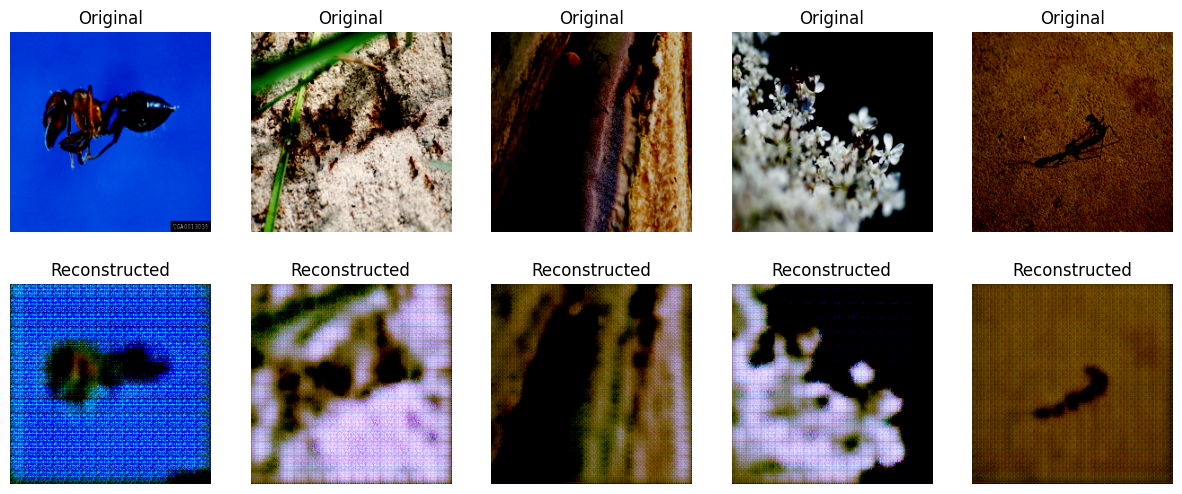

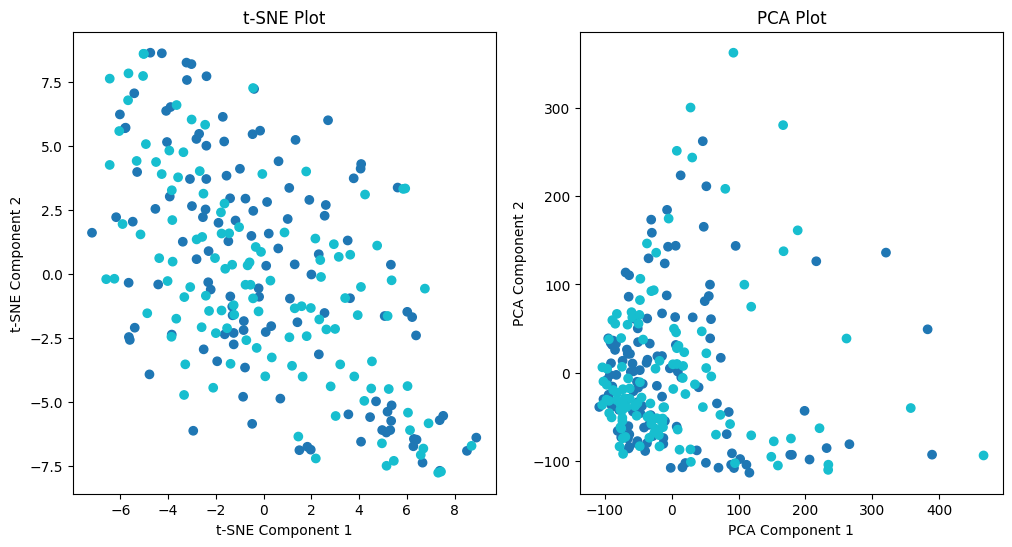

In [20]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader, Dataset
from PIL import Image
import os
import numpy as np
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from skimage.metrics import structural_similarity as ssim
from skimage.metrics import peak_signal_noise_ratio as psnr
import matplotlib.pyplot as plt


class HymenopteraDataset(Dataset):
    def __init__(self, root_dir, transform=None):
        self.root_dir = root_dir
        self.transform = transform

        self.classes = ['ants', 'bees']
        self.image_paths = []
        self.labels = []

        for i, class_name in enumerate(self.classes):
            class_dir = os.path.join(root_dir, class_name)
            for img_name in os.listdir(class_dir):
                self.image_paths.append(os.path.join(class_dir, img_name))
                self.labels.append(i)

    def __len__(self):
        return len(self.image_paths)

    def __getitem__(self, idx):
        img_path = self.image_paths[idx]
        label = self.labels[idx]

        image = Image.open(img_path).convert('RGB')  # Ensure images are in RGB format
        if self.transform:
            image = self.transform(image)

        return image, label


transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5])
])


train_dataset = HymenopteraDataset(root_dir='/content/drive/MyDrive/Dlops/hymenoptera_data/train', transform=transform)
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)


class CAE(nn.Module):
    def __init__(self):
        super(CAE, self).__init__()
        self.encoder = nn.Sequential(
            nn.Conv2d(3, 32, kernel_size=3, stride=2, padding=1),
            nn.LeakyReLU(0.2),
            nn.BatchNorm2d(32),
            nn.Conv2d(32, 64, kernel_size=3, stride=2, padding=1),
            nn.LeakyReLU(0.2),
            nn.BatchNorm2d(64),
            nn.Conv2d(64, 128, kernel_size=3, stride=2, padding=1),
            nn.LeakyReLU(0.2),
            nn.BatchNorm2d(128),
            nn.Conv2d(128, 256, kernel_size=3, stride=2, padding=1),
            nn.LeakyReLU(0.2),
            nn.BatchNorm2d(256)
        )
        self.decoder = nn.Sequential(
            nn.ConvTranspose2d(256, 128, kernel_size=3, stride=2, padding=1, output_padding=1),
            nn.ReLU(),
            nn.BatchNorm2d(128),
            nn.ConvTranspose2d(128, 64, kernel_size=3, stride=2, padding=1, output_padding=1),
            nn.ReLU(),
            nn.BatchNorm2d(64),
            nn.ConvTranspose2d(64, 32, kernel_size=3, stride=2, padding=1, output_padding=1),
            nn.ReLU(),
            nn.BatchNorm2d(32),
            nn.ConvTranspose2d(32, 3, kernel_size=3, stride=2, padding=1, output_padding=1),
            nn.Tanh()
        )

    def forward(self, x):
        x = self.encoder(x)
        x = self.decoder(x)
        return x


model = CAE()
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)


num_epochs = 10
for epoch in range(num_epochs):
    for images, _ in train_loader:
        optimizer.zero_grad()
        reconstructed = model(images)
        loss = criterion(reconstructed, images)
        loss.backward()
        optimizer.step()
    print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}")


with torch.no_grad():
    original_images = torch.stack([img for img, _ in train_dataset])
    reconstructed_images = model(original_images).detach()

    mse_loss = nn.MSELoss()(reconstructed_images, original_images)
    rmse = torch.sqrt(mse_loss).item()
    ssim_score = ssim(original_images.permute(0, 2, 3, 1).cpu().numpy(),
                      reconstructed_images.permute(0, 2, 3, 1).cpu().numpy(), multichannel=True)
    psnr_score = psnr(original_images.permute(0, 2, 3, 1).cpu().numpy(),
                      reconstructed_images.permute(0, 2, 3, 1).cpu().numpy())

    print(f"MSE: {mse_loss:.4f}, RMSE: {rmse:.4f}, SSIM: {ssim_score:.4f}, PSNR: {psnr_score:.4f}")


    fig, axes = plt.subplots(2, 5, figsize=(15, 6))
    for i in range(5):
        axes[0, i].imshow(original_images[i].permute(1, 2, 0).cpu().numpy())
        axes[0, i].set_title('Original')
        axes[0, i].axis('off')

        axes[1, i].imshow(reconstructed_images[i].permute(1, 2, 0).cpu().numpy())
        axes[1, i].set_title('Reconstructed')
        axes[1, i].axis('off')
    plt.show()


features = []
with torch.no_grad():
    for images, _ in train_loader:
        outputs = model.encoder(images)
        features.extend(outputs.view(outputs.size(0), -1).numpy())

features = np.array(features)

tsne = TSNE(n_components=2, random_state=42).fit_transform(features)
pca = PCA(n_components=2).fit_transform(features)

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.scatter(tsne[:, 0], tsne[:, 1], c=train_dataset.labels, cmap='tab10')
plt.title('t-SNE Plot')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')

plt.subplot(1, 2, 2)
plt.scatter(pca[:, 0], pca[:, 1], c=train_dataset.labels, cmap='tab10')
plt.title('PCA Plot')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')

plt.show()



**Question-2 - RGB image to negative image**

In [23]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader, Dataset
from PIL import Image
import os
import numpy as np
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from skimage.metrics import structural_similarity as ssim
from skimage.metrics import peak_signal_noise_ratio as psnr
from sklearn.metrics import precision_recall_curve, auc
import matplotlib.pyplot as plt

class HymenopteraDataset(Dataset):
    def __init__(self, root_dir, transform=None):
        self.root_dir = root_dir
        self.transform = transform

        self.classes = ['ants', 'bees']
        self.image_paths = []
        self.labels = []

        for i, class_name in enumerate(self.classes):
            class_dir = os.path.join(root_dir, class_name)
            for img_name in os.listdir(class_dir):
                self.image_paths.append(os.path.join(class_dir, img_name))
                self.labels.append(i)

    def __len__(self):
        return len(self.image_paths)

    def __getitem__(self, idx):
        img_path = self.image_paths[idx]
        label = self.labels[idx]
        image = Image.open(img_path).convert('RGB')

        # Applied the negative transformation to each channel independently
        image = Image.fromarray(np.array(image))
        r, g, b = image.split()
        r = Image.fromarray(255 - np.array(r))
        g = Image.fromarray(255 - np.array(g))
        b = Image.fromarray(255 - np.array(b))
        image = Image.merge('RGB', (r, g, b))

        if self.transform:
            image = self.transform(image)

        return image, label

transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5])
])


train_dataset = HymenopteraDataset(root_dir='/content/drive/MyDrive/Dlops/hymenoptera_data/train', transform=transform)
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)

class CAE(nn.Module):
    def __init__(self):
        super(CAE, self).__init__()
        self.encoder = nn.Sequential(
            nn.Conv2d(3, 32, kernel_size=3, stride=2, padding=1),
            nn.ReLU(),
            nn.Conv2d(32, 64, kernel_size=3, stride=2, padding=1),
            nn.ReLU(),
            nn.Conv2d(64, 128, kernel_size=3, stride=2, padding=1),
            nn.ReLU(),
            nn.Conv2d(128, 256, kernel_size=3, stride=2, padding=1),
            nn.ReLU()
        )
        self.decoder = nn.Sequential(
            nn.ConvTranspose2d(256, 128, kernel_size=3, stride=2, padding=1, output_padding=1),
            nn.ReLU(),
            nn.ConvTranspose2d(128, 64, kernel_size=3, stride=2, padding=1, output_padding=1),
            nn.ReLU(),
            nn.ConvTranspose2d(64, 32, kernel_size=3, stride=2, padding=1, output_padding=1),
            nn.ReLU(),
            nn.ConvTranspose2d(32, 3, kernel_size=3, stride=2, padding=1, output_padding=1),
            nn.Tanh()
        )

    def forward(self, x):
        x = self.encoder(x)
        x = self.decoder(x)
        return x


model = CAE()
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Train the CAE model
num_epochs = 10
for epoch in range(num_epochs):
    for images, _ in train_loader:
        optimizer.zero_grad()
        reconstructed = model(images)
        loss = criterion(reconstructed, images)
        loss.backward()
        optimizer.step()
    print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}")

# Save the trained model
torch.save(model.state_dict(), 'cae_model.pth')


Epoch [1/10], Loss: 0.3462
Epoch [2/10], Loss: 0.3043
Epoch [3/10], Loss: 0.2524
Epoch [4/10], Loss: 0.2100
Epoch [5/10], Loss: 0.1605
Epoch [6/10], Loss: 0.1306
Epoch [7/10], Loss: 0.1198
Epoch [8/10], Loss: 0.1019
Epoch [9/10], Loss: 0.0964
Epoch [10/10], Loss: 0.0820


**Question-2 - RGB Image to RGB horizontal
flipped image**

In [24]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader, Dataset
from PIL import Image
import os
import numpy as np
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from skimage.metrics import structural_similarity as ssim
from skimage.metrics import peak_signal_noise_ratio as psnr
from sklearn.metrics import precision_recall_curve, auc
import matplotlib.pyplot as plt

class HymenopteraDataset(Dataset):
    def __init__(self, root_dir, transform=None):
        self.root_dir = root_dir
        self.transform = transform

        self.classes = ['ants', 'bees']
        self.image_paths = []
        self.labels = []

        for i, class_name in enumerate(self.classes):
            class_dir = os.path.join(root_dir, class_name)
            for img_name in os.listdir(class_dir):
                self.image_paths.append(os.path.join(class_dir, img_name))
                self.labels.append(i)

    def __len__(self):
        return len(self.image_paths)

    def __getitem__(self, idx):
        img_path = self.image_paths[idx]
        label = self.labels[idx]
        image = Image.open(img_path).convert('RGB')

        # Apply the horizontal flip transformation
        image = transforms.functional.hflip(image)

        if self.transform:
            image = self.transform(image)

        return image, label

transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5])
])


train_dataset = HymenopteraDataset(root_dir='/content/drive/MyDrive/Dlops/hymenoptera_data/train', transform=transform)
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)

class CAE(nn.Module):
    def __init__(self):
        super(CAE, self).__init__()
        self.encoder = nn.Sequential(
            nn.Conv2d(3, 32, kernel_size=3, stride=2, padding=1),
            nn.ReLU(),
            nn.Conv2d(32, 64, kernel_size=3, stride=2, padding=1),
            nn.ReLU(),
            nn.Conv2d(64, 128, kernel_size=3, stride=2, padding=1),
            nn.ReLU(),
            nn.Conv2d(128, 256, kernel_size=3, stride=2, padding=1),
            nn.ReLU()
        )
        self.decoder = nn.Sequential(
            nn.ConvTranspose2d(256, 128, kernel_size=3, stride=2, padding=1, output_padding=1),
            nn.ReLU(),
            nn.ConvTranspose2d(128, 64, kernel_size=3, stride=2, padding=1, output_padding=1),
            nn.ReLU(),
            nn.ConvTranspose2d(64, 32, kernel_size=3, stride=2, padding=1, output_padding=1),
            nn.ReLU(),
            nn.ConvTranspose2d(32, 3, kernel_size=3, stride=2, padding=1, output_padding=1),
            nn.Tanh()
        )

    def forward(self, x):
        x = self.encoder(x)
        x = self.decoder(x)
        return x


model = CAE()
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Train the CAE model
num_epochs = 10
for epoch in range(num_epochs):
    for images, _ in train_loader:
        optimizer.zero_grad()
        reconstructed = model(images)
        loss = criterion(reconstructed, images)
        loss.backward()
        optimizer.step()
    print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}")

# Save the trained model
torch.save(model.state_dict(), 'cae_model.pth')


KeyboardInterrupt: 

In [ ]:
print("v2")